In [40]:
# ! pip install kneed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from tqdm import tqdm
from sklearn.cluster import KMeans
from kneed import KneeLocator

warnings.filterwarnings('ignore')
sns.set()

### Plano

- Fazer o cálculo da inércia do paper e plotar
- Implement the Gap metric and compare
- Transformar em SNS pra ter o hue

## Creating the Datasets

In [2]:
normal_noise = pd.DataFrame()
normal_noise['d1'] = np.random.normal(size=500)
normal_noise['d2'] = np.random.normal(size=500)
normal_noise['target'] = 1

In [3]:
three_blobs = pd.DataFrame()

for loc in [1, 5, 10]:
    aux = pd.DataFrame()
    aux['d1'] = np.random.normal(loc=loc, scale=0.5, size=500)
    aux['d2'] = np.random.normal(loc=loc, scale=0.5, size=500)
    aux['target'] = loc
    
    three_blobs = pd.concat([three_blobs, aux])

In [4]:
overlapping_blobs = pd.DataFrame()

for loc in [1, 3, 5]:
    aux = pd.DataFrame()
    aux['d1'] = np.random.normal(loc=loc, scale=0.8, size=500)
    aux['d2'] = np.random.normal(loc=loc, scale=0.8, size=500)
    aux['target'] = loc
    
    overlapping_blobs = pd.concat([overlapping_blobs, aux])

In [5]:
many_blobs = pd.DataFrame()
for i in range(30):
    loc_1 = i + 3 * np.random.normal(2, 2)
    loc_2 = i + 3 * np.random.normal(2, 2)
    aux = pd.DataFrame()
    aux['d1'] = np.random.normal(loc=loc_1, scale=0.35, size=50)
    aux['d2'] = np.random.normal(loc=loc_2, scale=0.35, size=50)
    aux['target'] = i
    
    many_blobs = pd.concat([many_blobs, aux])

Text(781.4659090909089, 0.5, '')

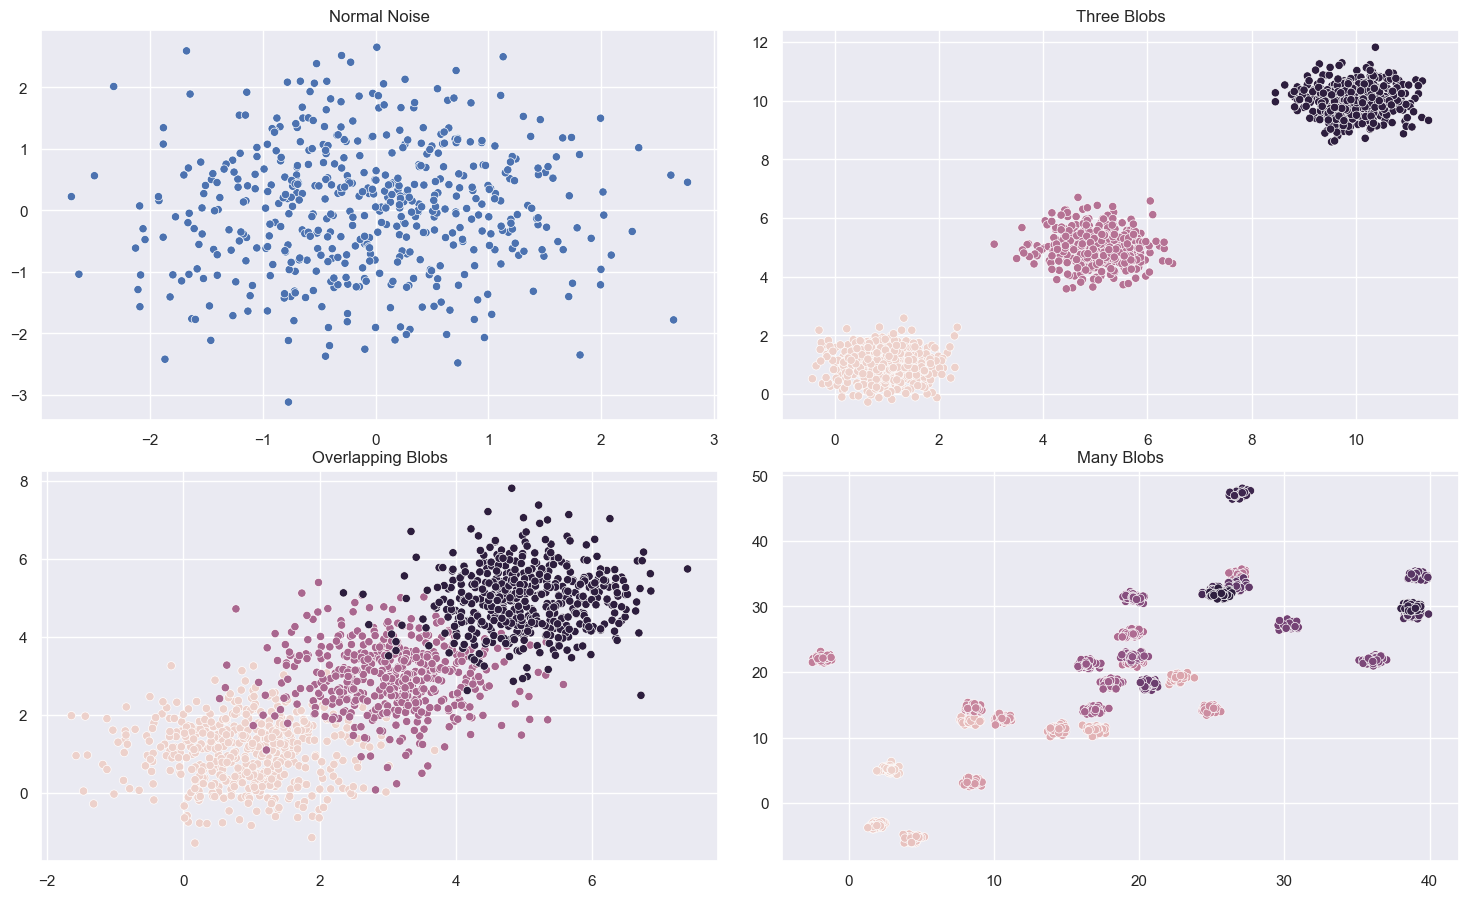

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(15,9))
fig.tight_layout()

sns.scatterplot(data=normal_noise, x='d1', y='d2', hue='target', ax=axs[0,0], legend=False)
axs[0,0].set_title('Normal Noise')
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('')

sns.scatterplot(data=three_blobs, x='d1', y='d2', hue='target', ax=axs[0,1], legend=False)
axs[0,1].set_title('Three Blobs')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

sns.scatterplot(data=overlapping_blobs, x='d1', y='d2', hue='target', ax=axs[1,0], legend=False)
axs[1,0].set_title('Overlapping Blobs')
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('')

sns.scatterplot(data=many_blobs, x='d1', y='d2', hue='target', ax=axs[1,1], legend=False)
axs[1,1].set_title('Many Blobs')
axs[1,1].set_xlabel('')
axs[1,1].set_ylabel('')

### Plotting the Elbow

100%|██████████| 49/49 [00:00<00:00, 91.29it/s] 


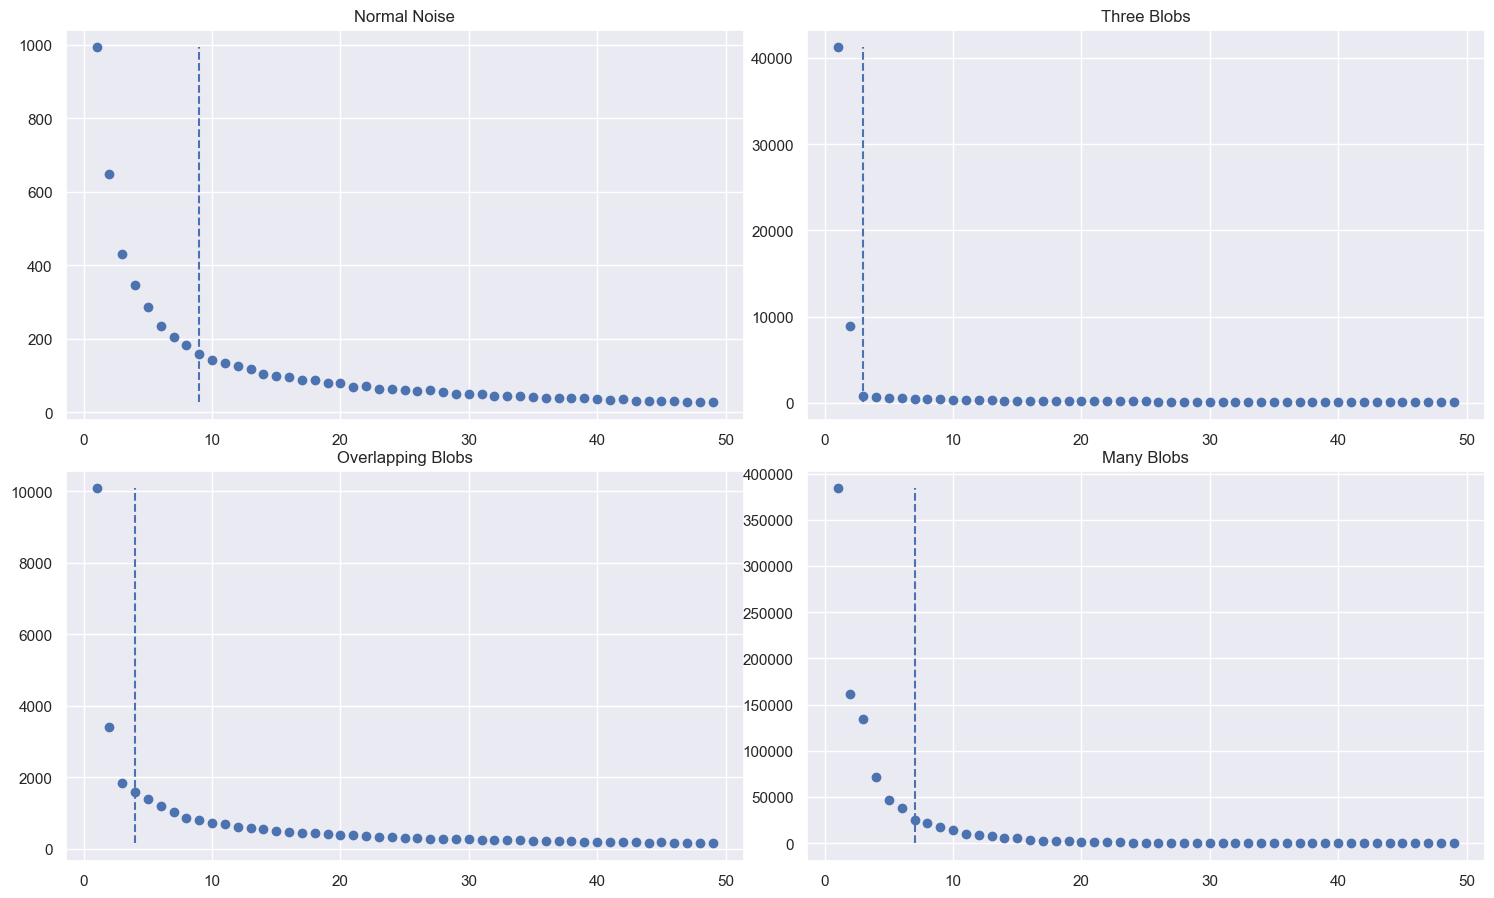

In [17]:
dfs = [normal_noise, three_blobs, overlapping_blobs, many_blobs]
lists = []
knees = []
for i, df in enumerate(dfs):
    inertias = []
    for k in tqdm(range(1,50)):
        model = KMeans(n_clusters=k, n_init='auto')
        model.fit(df.drop(columns=['target']))

        inertias.append(model.inertia_)
    lists.append(inertias)

    kn = KneeLocator([i for i in range(1,50)], inertias, curve='convex', direction='decreasing')
    knees.append(kn.knee)

fig, axs = plt.subplots(2, 2, figsize=(15,9))
fig.tight_layout()

axs[0,0].scatter([i for i in range(1,50)], lists[0])
axs[0,0].set_title('Normal Noise')
axs[0,0].vlines(knees[0], min(lists[0]), max(lists[0]), linestyles='dashed')

axs[0,1].scatter([i for i in range(1,50)], lists[1])
axs[0,1].set_title('Three Blobs')
axs[0,1].vlines(knees[1], min(lists[1]), max(lists[1]), linestyles='dashed')

axs[1,0].scatter([i for i in range(1,50)], lists[2])
axs[1,0].set_title('Overlapping Blobs')
axs[1,0].vlines(knees[2], min(lists[2]), max(lists[2]), linestyles='dashed')

axs[1,1].scatter([i for i in range(1,50)], lists[3])
axs[1,1].set_title('Many Blobs')
axs[1,1].vlines(knees[3], min(lists[3]), max(lists[3]), linestyles='dashed')

In [18]:
H = []
for inertias in lists:
    N = len(dfs[-1])
    k_t = len(inertias)
    
    h = []
    for k in range(1, k_t):
        SSE_k = ((N - k) / k) * min([(j / (N-j))*inertias[j] for j in range(1, k+1)])
        h.append(np.sqrt(inertias[k] / SSE_k))
        
    H.append(h)

Text(0.5, 1.0, 'Many Blobs')

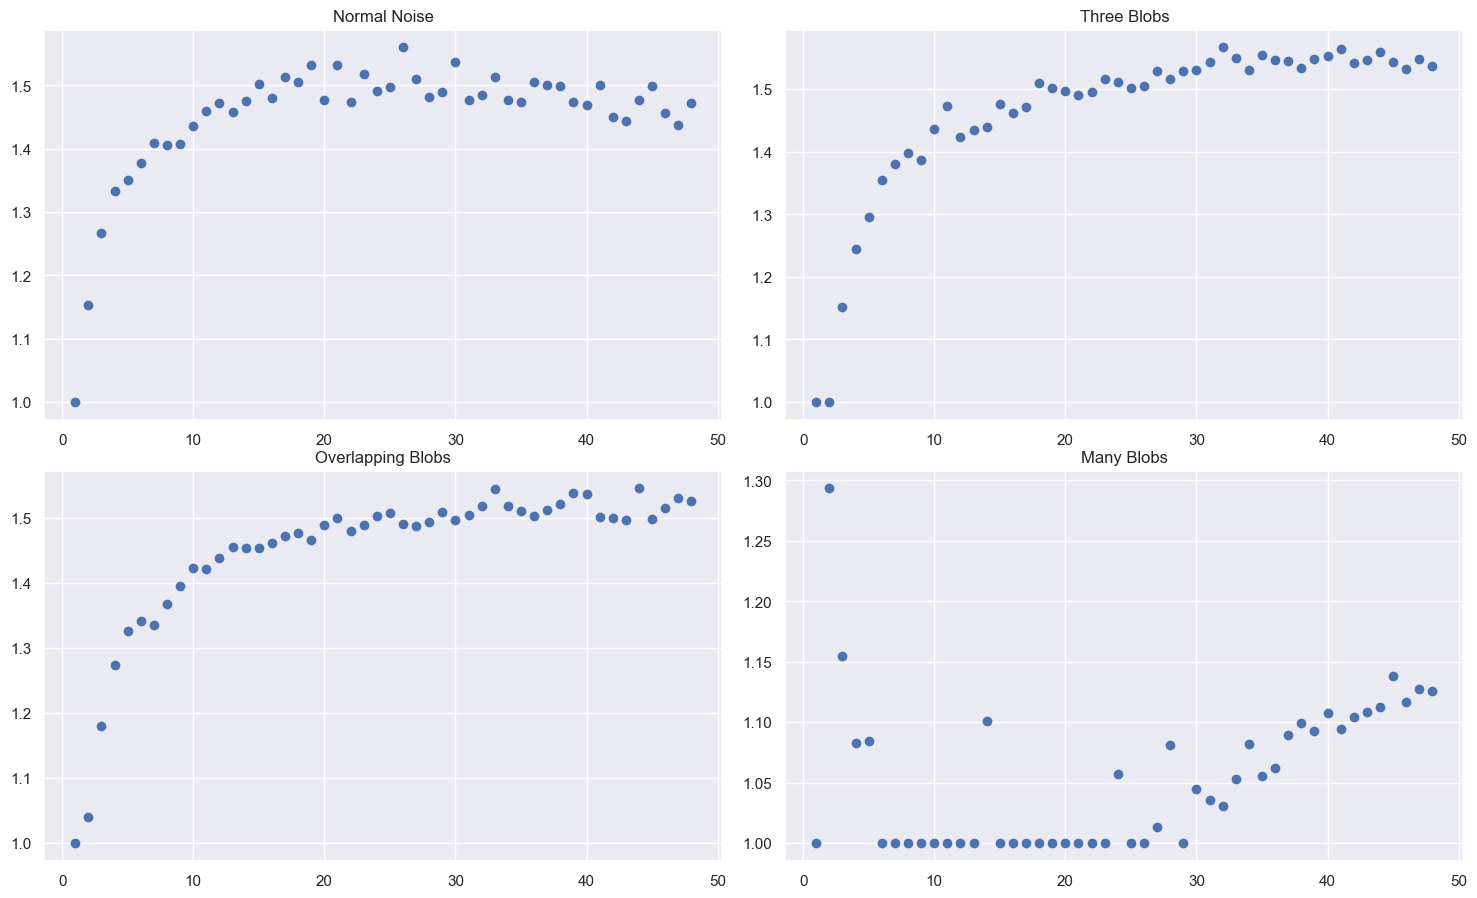

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(15,9))
fig.tight_layout()

axs[0,0].scatter([i for i in range(1,49)], H[0])
axs[0,0].set_title('Normal Noise')

axs[0,1].scatter([i for i in range(1,49)], H[1])
axs[0,1].set_title('Three Blobs')


axs[1,0].scatter([i for i in range(1,49)], H[2])
axs[1,0].set_title('Overlapping Blobs')


axs[1,1].scatter([i for i in range(1,49)], H[3])
axs[1,1].set_title('Many Blobs')